# Community detection algorithms 2

It turns out, that Networkx is weak in terms of community detection.. And since it is forbidden to install additional software on our department computers, we will use only what we have.

And the only thing we have is **k-clique perlocation**.

In [3]:
!pip install --user --upgrade networkx


Requirement already up-to-date: networkx in /home/lsherstyuk/anaconda3/envs/cnn/lib/python3.6/site-packages (2.4)


In [4]:
import numpy as np
import sklearn.metrics as metrics
import scipy.io
from scipy.spatial.distance import pdist, squareform
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
plt.xkcd()
import networkx as nx
%matplotlib inline

## k-clique perlocation

Lets load our beloved Zackhary Karate Club and run 3-clique perlocations. Find 3-cliques communities and assign a cluster label to each node. Draw the graph with respect to the community assignment. Try to highligh intersected nodes.

In [9]:
G = nx.karate_club_graph()
# cliqComm = nx.k_clique_communities(G, 3)
cliqComm =nx.find_cliques(G)
cliqComm=list(cliqComm)
cliqComm


[[0, 1, 17],
 [0, 1, 2, 3, 13],
 [0, 1, 2, 3, 7],
 [0, 1, 19],
 [0, 1, 21],
 [0, 4, 10],
 [0, 4, 6],
 [0, 5, 10],
 [0, 5, 6],
 [0, 8, 2],
 [0, 11],
 [0, 12, 3],
 [0, 31],
 [1, 30],
 [2, 32, 8],
 [2, 9],
 [2, 27],
 [2, 28],
 [5, 16, 6],
 [33, 32, 8, 30],
 [33, 32, 14],
 [33, 32, 15],
 [33, 32, 18],
 [33, 32, 20],
 [33, 32, 22],
 [33, 32, 23, 29],
 [33, 32, 31],
 [33, 9],
 [33, 13],
 [33, 19],
 [33, 26, 29],
 [33, 27, 23],
 [33, 28, 31],
 [24, 25, 31],
 [24, 27],
 [25, 23]]

In [11]:
colorList=np.ones([G.order(),])
for c in range(len(cliqComm)):
    for i in cliqComm[c]:
        colorList[i] += c+1
print( colorList    )

[ 92.  30.  82.  18.  14.  37.  36.   4.  46.  45.  15.  12.  13.  32.
  22.  23.  20.   2.  24.  35.  25.   6.  26.  95.  70.  71.  32.  85.
  52.  58.  35. 108. 204. 372.]


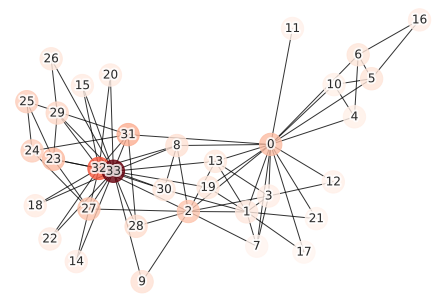

In [12]:
nx.draw(G, 
        cmap = plt.get_cmap('Reds'), 
        node_color=colorList, 
        node_size=500, 
        alpha=0.8, 
        with_labels=True)

## Partition similarity measures

The following similarity measures are ofter used to evaluate the performance of community detection (clustering) algorithm in situation when a dataset has ground-truth partition (Generators, Real datasets).

### Ratio of correctly clustered observations (Accuracy)

Let's denote $\hat{\pi}$ as an outcome of community detection algorithm and $\pi^*$ as a real partition. Ratio of correctly clustered observations is calculated as

$$ Acc(\hat{\pi}, \pi^*) = \frac{\text{# of correctly clustered obs}}{N} \text{,}$$
where observation is identified as "correctly clustered" if **at least half** its co-clustered observations in produced partition $\hat{\pi}$ belong to the same cluster in partition $\pi^*$

### Rand Index (Adjusted Rand Index)

$$ \text{Rand}(\hat{\pi},\pi^*) = \frac{a + d}{a + b + c + d} \text{,}$$
where 
* $a$ is number of pairs of vertices that are in the same communities in both partitions $\hat{\pi}$ and
$\pi^*$, 
* $b$ ($c$) is the number of pairs that are put in same community in partition  $\hat{\pi}$ ($\pi^*$) and in different
communities in  $\pi^*$ ($\hat{\pi}$)
* $d$ shows the number of pairs of vertices that are in different in both partitions.

Adjusted Rand Index is a slightly corrected version of Rand index:

$$\text{ARI}(\hat{\pi},\pi^*)   = \frac{\text{Rand}(\hat{\pi},\pi^*) - \text{Expected}}{\text{Max} - \text{Expected}}$$

As "alternaite" there is also a measure called **[Normalized Mutual Information](http://en.wikipedia.org/wiki/Mutual_information)**. I call it alternative, because the results of NMI and ARI are quite similar.

## Partition quality measures

### Modularity

Yes, we have seen it before.

Newman randomized version of the graph is obtained with rewinding of the edges under the constraint, that the expected degree of each vertex matches the degree of the vertex in the original graph. The expected number of edges between vertices $v_i$ and $v_j$ in given graph is $k_i k_j/2m$. Thus the modularity can be written as

\begin{equation}
	Q = \frac{1}{2m} \sum\limits_{ij}\left(a_{ij} - \frac{k_i k_j}{2m}\right)\delta(\mathcal{C}_i,\mathcal{C}_j),
\end{equation}

where $\delta(\cdot,\cdot)$ is *Kronecker's delta* and $\mathcal{C}_i$ is cluster label of vertex $v_i$. The more number of edges exceeds the expected number of connections the better community is defined. So, large values of modularity indicate good communities, however this is now always true. Moreover the maximum of graph's modularity generally grows if the size of the graph and/or the number of separated clusters increase.

#### Task:

1. Load networks [2](https://www.hse.ru/data/2016/03/15/1127699956/network2.mat) and [3](https://www.hse.ru/data/2016/03/15/1127703057/network3.mat) with ground truth partitions
2. Run hierarchical clustering algorithm and retrive 4 clusters from it
3. Calculate ARI

*HINT:
pdist, hierarchy.average(), hierarchy.dendrogram(), hierarchy.fcluster, metrics.adjusted_rand_score()*

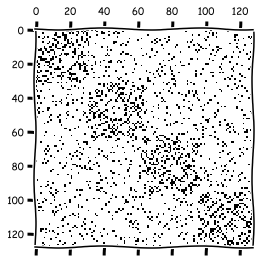

In [15]:
data = scipy.io.loadmat('network3.mat')
A = data['A'].astype('float')
plt.spy(A)
comm = data['Comm']

G = nx.Graph(A)
pos = nx.spring_layout(G, scale = 5, iterations=100)

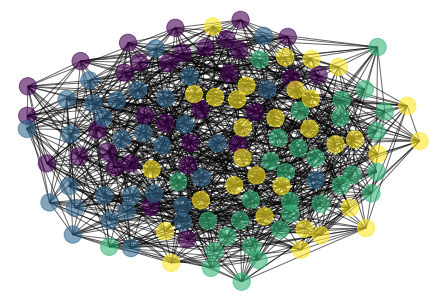

In [16]:
nx.draw(G, 
        pos, 
        node_color=comm,
        alpha = 0.6,
        with_labels = False)

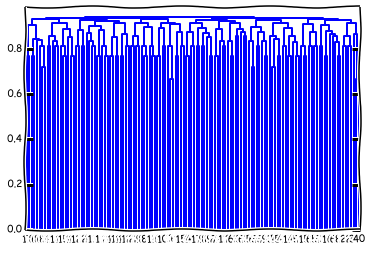

In [28]:
D = pdist(A, metric = 'jaccard')
hc = hierarchy.average(D)
Z = hierarchy.dendrogram(hc)

In [29]:
comm2 = hierarchy.fcluster(hc, 4, criterion='maxclust')
comm = comm.flatten()
metrics.adjusted_rand_score(comm, comm2)

0.11638609695134744

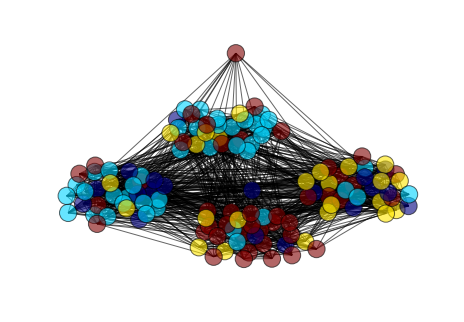

In [30]:
nx.draw(G, 
        pos, 
        node_color=comm2,
        alpha = 0.6,
        with_labels = False)